In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image

Using TensorFlow backend.


In [2]:
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()

170500096/170498071 [==============================] - 309s 2us/step


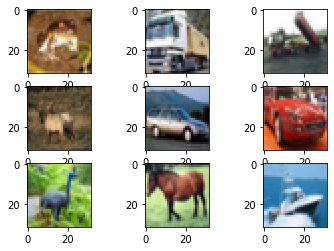

In [12]:
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    img = xtrain[i]
    plt.imshow(img)

plt.show()

In [13]:
seed=6
np.random.seed(seed)

(xtrain,ytrain),(xtest,ytest) = cifar10.load_data()

xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

xtrain/=255.0
xtest/=255.0


In [14]:
ytrain = np_utils.to_categorical(ytrain)
ytest = np_utils.to_categorical(ytest)
num_class = ytest.shape[1]
print(num_class)

print(ytrain.shape)
print(ytrain[0])

10
(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [15]:
from keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D
from keras.optimizers import SGD

In [21]:
def allcnn(weights = None):
    model=Sequential()
    
    model.add(Conv2D(96,(3,3), padding='same', input_shape=(32,32,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3),padding='same', strides = (2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192,(3,3), padding='same' ))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(3,3),padding='same', strides = (2,2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(192,(3,3), padding='same' ))
    model.add(Activation('relu'))
    model.add(Conv2D(192,(1,1),padding='valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10,(1,1),padding='valid' ))
    
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    if(weights):
        model.load_weights(weights)
        
    return model
    

In [23]:
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

weights='all_cnn_weights_0.9088_0.4994.hdf5'
model = allcnn(weights)

sgd = SGD(lr=learning_rate, decay =weight_decay, momentum = momentum, nesterov= True )
model.compile(loss='categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])

print(model.summary())

# epochs = 350
# batch_size = 32

# model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=epochs, batch_size=batch_size, verbose=1)

scores = model.evaluate(xtest,ytest,verbose=1)
print('accuracy: {}'.format(scores[1]))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_17 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_18 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 16, 16, 192)      

In [24]:
classes = range(0,10)
names= ['aeroplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

class_labels=dict(zip(classes,names))
print(class_labels)

{0: 'aeroplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [27]:
batch = xtest[100:109]
labels = np.argmax(ytest[100:109],axis=-1)
print(labels)


[4 5 6 3 1 1 3 6 8]


In [29]:
predictions = model.predict(batch, verbose=1)
print(predictions)

9/9 [==============================] - 0s 3ms/step
[[4.5647234e-18 1.0580984e-20 1.8923278e-10 2.1411404e-11 9.9999928e-01
  2.8037445e-07 3.1478666e-13 4.2381450e-07 1.3699557e-19 1.2097066e-18]
 [2.1190902e-16 2.0386626e-17 1.5672676e-09 5.3581510e-07 1.6256110e-10
  9.9999940e-01 1.6712491e-09 2.0782188e-08 3.6548053e-15 3.5128330e-16]
 [1.2720517e-30 5.0274027e-28 5.1540022e-24 3.6051544e-21 1.0875264e-27
  8.1522779e-22 1.0000000e+00 1.1050992e-27 6.1924619e-32 1.2274381e-23]
 [1.5143771e-16 4.7668690e-18 2.2583695e-09 1.0000000e+00 4.3481128e-11
  1.6884179e-12 4.5317125e-13 2.6686954e-16 7.2659426e-19 6.2049710e-17]
 [8.2502348e-36 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 9.3568045e-36 8.6868626e-30 8.2192576e-22]
 [5.9699731e-24 1.0000000e+00 7.5485268e-27 8.0228679e-27 1.9714101e-30
  2.7338925e-29 7.2188490e-31 5.5680368e-27 1.6186991e-26 1.1906196e-13]
 [6.4563792e-18 2.9642424e-20 1.0046514e-11 9.9999988e-01 6.0156128e-13
  9.111

In [30]:
class_result = np.argmax(predictions,axis=-1)
print(class_result)

[4 5 6 3 1 1 3 6 8]


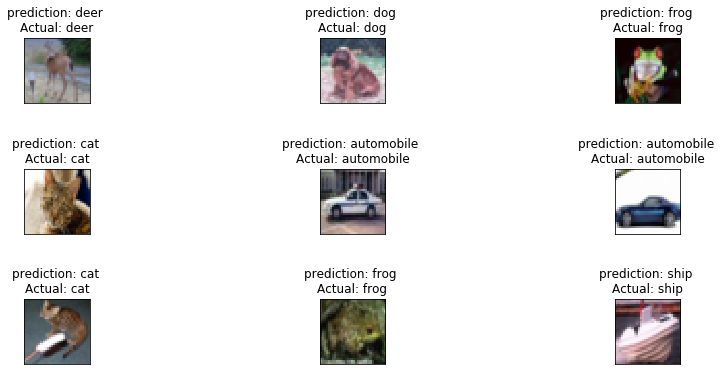

In [32]:
fig,axs = plt.subplots(3,3,figsize = (15,6))
fig.subplots_adjust(hspace=1)
axs = axs.flatten()

for i,img in enumerate(batch):
    for key,value in class_labels.items():
        if(class_result[i]==key):
            title = 'prediction: {} \nActual: {}'.format(class_labels[key],class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    axs[i].imshow(img)
    
plt.show()